# Explore here

In [1]:
# Your code here
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd
import requests
import matplotlib.pyplot as plt

resource_url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

response = requests.get(resource_url)

if response.status_code == 200:
    print("¡Petición exitosa! Código:", response.status_code)
    with open("/workspaces/Finarosalina_Regresion_lineal_EDA_insurance/data/raw/medical_insurance_cost.csv", "w", encoding="utf-8") as dataset:
        dataset.write(response.text)
else:
    print("Error al descargar el archivo. Código de estado:", response.status_code)

ds=pd.read_csv("/workspaces/Finarosalina_Regresion_lineal_EDA_insurance/data/raw/medical_insurance_cost.csv")

ds.describe()

¡Petición exitosa! Código: 200


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [2]:
# Verificar si hay filas duplicadas: si hay 1 que se elimina
ds=ds.drop_duplicates()
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Variables Categoricas: 'sex', 'smoker', 'region', 'children'  (children lo situo como categórico por simplicidad, ya que toma valores discretos)
Variables numéricas: 'age', 'bmi'
Target: 'charges'

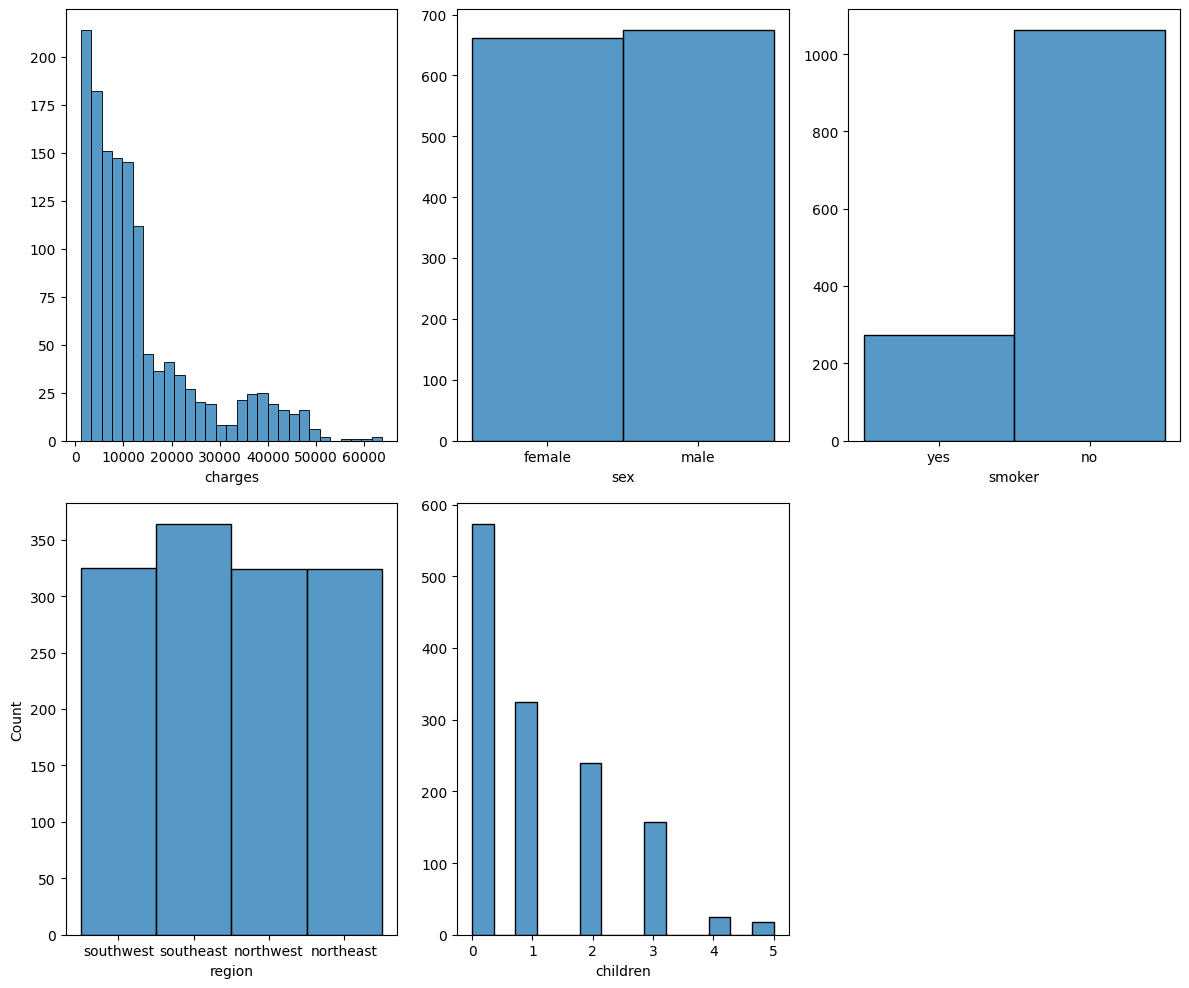

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(2, 3, figsize=(12, 10))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=ds, x="charges").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=ds, x="sex").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=ds, x="smoker").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=ds, x="region")
sns.histplot(ax=axis[1, 1], data=ds, x="children").set(ylabel=None)


# Eliminar el subplot vacío que sobra (axis[3, 2])
fig.delaxes(axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

La mayor parte de los datos de charges están por debajo de 15.000, pero tanbien cuenta con resultados entre 15.000-50.000, por lo que los resultados son muy dispersos.

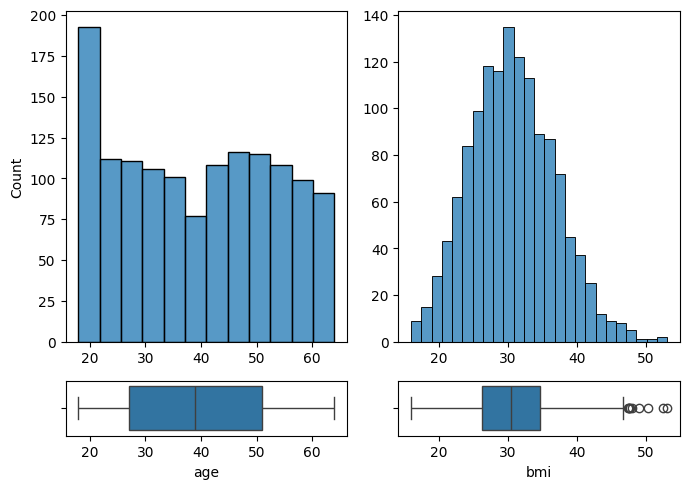

In [5]:
fig, axis = plt.subplots(2, 2, figsize = (7, 5), gridspec_kw={'height_ratios': [6, 1]})

# Variables numéricas: 'age', 'bmi'

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = ds, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = ds, x = "age")
sns.histplot(ax = axis[0, 1], data = ds, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = ds, x = "bmi")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


En BMI, se aprecian valores atípicos por encima de 46, son 16 valores, pero tras representar histograma y ver los valores >47 y su dispersion en el valor de charges, decido eliminarlos.
En cuanto a la edad, la mayor parte de los datos están entre 27-50 años, con media aprox de 39, pero existe un pico de datos en torno a los 20 años, con un 25% de valores por debajo de 27.Pero no pueden considerarse outliers.

In [11]:
outlier_bmi= ds[ds['bmi']>46]
outlier_bmi

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
438,52,female,46.75,5,no,southeast,12592.53450
454,32,male,46.53,2,no,southeast,4686.38870
543,54,female,47.41,0,yes,southeast,63770.42801
547,54,female,46.70,2,no,southwest,11538.42100
549,43,female,46.20,0,yes,southeast,45863.20500
660,37,male,46.53,3,no,southeast,6435.62370
847,23,male,50.38,1,no,southeast,2438.05520


<Axes: xlabel='bmi', ylabel='Count'>

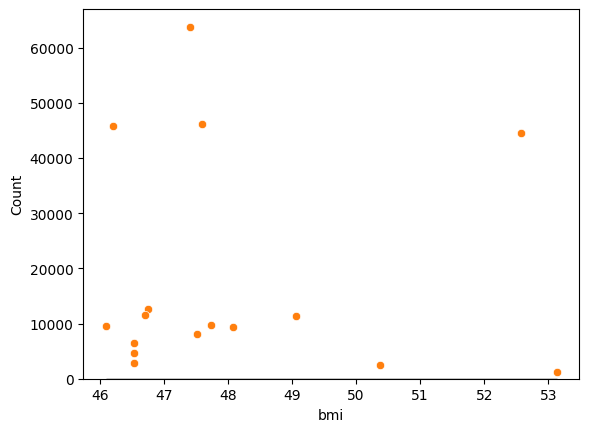

In [14]:
sns.histplot(data=outlier_bmi, x="bmi")
sns.scatterplot(data=outlier_bmi, x="bmi", y="charges")

In [23]:
ds=ds[ds['bmi']<47]

La distribucion de la edad es mas o menos uniforme y no se aprecian valores atípicos.
El BMI si tiene outliers, que seguramente haya que eliminar.